#**ASSIGNMENT: 3**
###**TEAM MEMBER 1**
###**NAME:ANLIN BERNISHIA S**
###**ROLL NO:612919104008**

#**BUILD CNN MODEL FOR CLASSIFICATION OF FLOWERS**

##**IMAGE AUGUMENTATION**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/Flower_recognition/training_set',
                                           target_size=(100,100),
                                           class_mode='categorical',
                                           batch_size=100)

Found 3377 images belonging to 5 classes.


In [5]:
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/Flower_recognition/testing_set',
                                           target_size=(100,100),
                                           class_mode='categorical',
                                           batch_size=100)

Found 940 images belonging to 5 classes.


##**CNN MODEL**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

##Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output) 

In [7]:
model = Sequential() # Initializing sequential model 
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(100,100,3))) # Convolution layer 
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer 
model.add(Flatten()) # Flatten layer 
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer 

##**COMPILE THE MODEL**

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

##**FIT THE MODEL**

In [10]:
model.fit(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=30,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/30
34/34 [==============================] - 934s 28s/step - loss: 2.8002 - accuracy: 0.3651 - val_loss: 1.3209 - val_accuracy: 0.4394
Epoch 2/30
34/34 [==============================] - 58s 2s/step - loss: 1.1349 - accuracy: 0.5487 - val_loss: 1.1793 - val_accuracy: 0.5457
Epoch 3/30
34/34 [==============================] - 59s 2s/step - loss: 1.0422 - accuracy: 0.5872 - val_loss: 1.1551 - val_accuracy: 0.5883
Epoch 4/30
34/34 [==============================] - 58s 2s/step - loss: 0.9611 - accuracy: 0.6340 - val_loss: 1.0928 - val_accuracy: 0.6000
Epoch 5/30
34/34 [==============================] - 59s 2s/step - loss: 0.9155 - accuracy: 0.6470 - val_loss: 1.2069 - val_accuracy: 0.5766
Epoch 6/30
34/34 [==============================] - 59s 2s/step - loss: 0.8855 - accuracy: 0.6506 - val_loss: 1.0989 - val_accuracy: 0.5915
Epoch 7/30
34/34 [==============================] - 59s 2s/step - loss: 0.8299 - accuracy: 0.6784 - val_loss: 1.0659 - val_accuracy: 0.6309
Epoch 8/30
34/34 [

##**SAVE THE MODEL**

In [11]:
model.save('flower.h5')

##**TEST THE MODEL**

In [13]:
from tensorflow.keras.preprocessing import image  # Importing req. lib
import numpy as np


##Testing 1

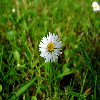

In [25]:
img = image.load_img('/content/drive/MyDrive/Flower_recognition/testing_set/daisy/2538504987_fe524b92a8_n.jpg',target_size=(100,100))
img

In [26]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

1/1 [==============================] - 0s 40ms/step
0
daisy


##Testing 2

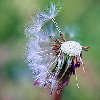

In [28]:
img = image.load_img('/content/drive/MyDrive/Flower_recognition/testing_set/dandelion/2335702923_decb9a860b_m.jpg',target_size=(100,100))
img

In [29]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

1/1 [==============================] - 0s 41ms/step
1
dandelion


##Testing 3

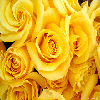

In [18]:
img = image.load_img('/content/drive/MyDrive/Flower_recognition/testing_set/rose/145862135_ab710de93c_n.jpg',target_size=(100,100))
img

In [19]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

1/1 [==============================] - 0s 38ms/step
2
rose


In [20]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

##Testing 4

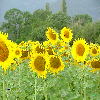

In [21]:
img = image.load_img('/content/drive/MyDrive/Flower_recognition/testing_set/sunflower/200557981_f800fa1af9.jpg',target_size=(100,100))
img

In [22]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

1/1 [==============================] - 0s 41ms/step
3
sunflower


##Testing 5

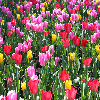

In [23]:
img = image.load_img('/content/drive/MyDrive/Flower_recognition/testing_set/tulip/2256230386_08b54ca760.jpg',target_size=(100,100))
img

In [24]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

1/1 [==============================] - 0s 61ms/step
4
tulip
